1. The code snippet in Listing 1 shows the code to generate a noisy point set X amounting to a circle and the
code to estimate a circle—center and the radius—from a set of inliers in X.


In [152]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import random

In [153]:
def model_circle(point_list):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    p1,p2,p3 = point_list[0], point_list[1], point_list[2]
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)

def get_inliers(data_list, center, r):
    """
    Returns the list of inliers to a model of a circle from a set of points.
    The threshold value is taken as 1/5th of the radius
    """
    inliers = []
    thresh = r//

    for i in range(len(data_list)):
        error = np.sqrt((data_list[i][0]-center[0])**2 + (data_list[i][1]-center[1])**2) - r
        if error < thresh:
            inliers.append(data_list[i])

    return np.array(inliers)

def random_sample(data_list):
    """
    Returns a list of 3 random samples from a given list
    """
    sample_list = []
    rand_nums = random.sample(range(1, len(data_list)), 3)
    for i in rand_nums:
        sample_list.append(data_list[i])
    return np.array(sample_list)

In [154]:
# RANSAC
def RANSAC(data_list, itr):
    """
    Return the center, radius and the best sample and its inliers used to fit the circle to a set of points using RANSAC
    """
    best_sample = []
    best_center = (0,0)
    best_radius = 0
    best_inliers = []
    max_inliers = 0
    
    for i in range(itr):
        samples = random_sample(data_list)
        center, radius = model_circle(samples)
        inliers = get_inliers(data_list, center, radius)
        num_inliers = len(inliers)
        if num_inliers > max_inliers:
            best_sample = samples
            max_inliers = num_inliers
            best_center = center
            best_radius = radius
            best_inliers = inliers

    print("Center =", best_center)
    print("Radius =", best_radius)

    return best_center, best_radius, best_sample, best_inliers

Center = (0.4711835879246424, -1.5045456888879325)
Radius = 11.209313426766712
Ratio of inliers = 100.0 %


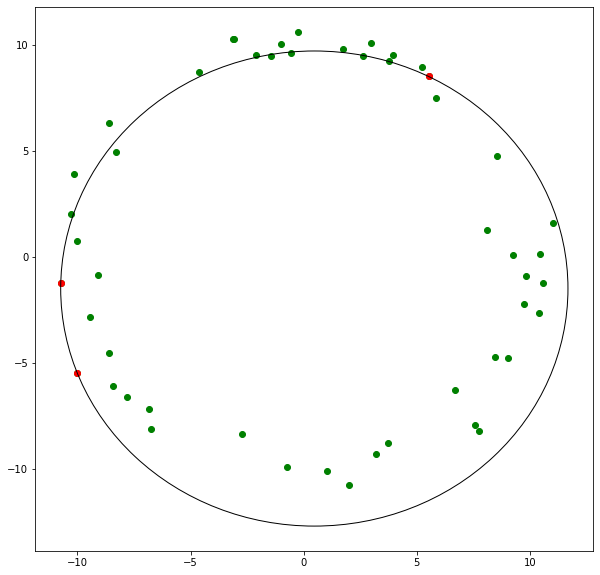

In [156]:
np.random.seed(5)
N = 100
half_n = N // 2
r = 10
s = r / 16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

center, radius, sample, inliers = RANSAC(X_circ, 10000)
fig,ax = plt.subplots(1,1, figsize = (10,10))
circle = plt.Circle(center, radius, fill = False)
ax.scatter(inliers[:,0], inliers[:,1], color = 'green')
ax.add_patch(circle)
ax.scatter(sample[:,0], sample[:,1], color = 'red')
print("Ratio of inliers =",len(inliers)/half_n*100, "%")

for i in range(len(X_circ)):
    if X_circ[i] not in inliers:
        ax.scatter(X_circ[i][0], X_circ[i][1], color = 'blue')